## Machine learning Python libraries

**Machine learning**

''Machine learning is a rapidly growing field of study that involves the development of algorithms and statistical models that enable computers to learn from data and make predictions or decisions without being explicitly programmed. Machine learning techniques are increasingly being used in a variety of applications, from image and speech recognition to natural language processing and autonomous vehicles. As a statistics student, you already have a strong foundation in data analysis and statistical inference, which are crucial skills in machine learning. Through the study of machine learning, you can gain a deeper understanding of how to model complex data and extract useful insights from it, as well as how to design and evaluate algorithms that can learn from this data.''

**Note:** this is an introduction lecture on machine learning without exercises or assignments. 

**Key points:** *algorithms, statistical models, not explicitly programmed, statistical inference*

**Learning goals:**

- Gain knowledge about the basic capabilities of Python modules `Scikit-learn` and `Keras`
- Apply simple regression and classification methods.

**Python libraries**

- scikit-learn
    - preprocessing
    - classification
    - regression
    - clustering
    - dimensionality reduction
    - model selection
- Keras
    - Demo : simple neural network



## Iris dataset

The iris dataset contains 150 samples of iris species, `setosa`, `versicolor` and `virginica` with 50 observations per species. An iris has two features `sepal` and `petal`, see figure below, and for each feature there are the length and width measurements.

<img src="images/iris1.png" alt= “” width="600" align='center'>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

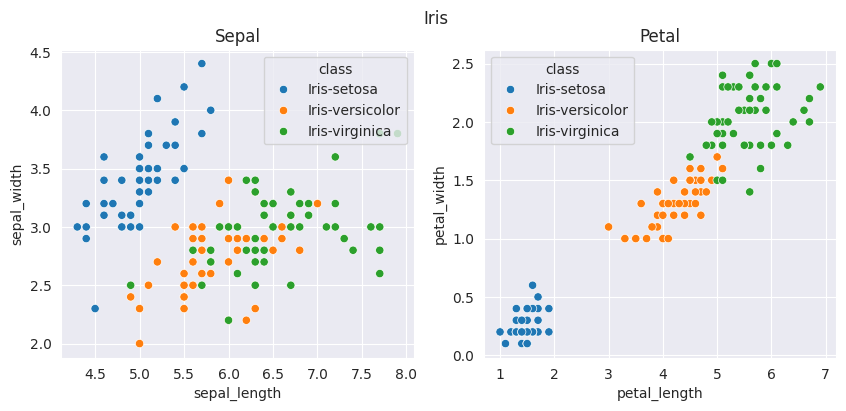

In [4]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Iris")
axes[0].set_title("Sepal")
axes[1].set_title("Petal")
sb.scatterplot(iris, x='sepal_length', y='sepal_width', hue='class',ax=axes[0])
sb.scatterplot(iris, x='petal_length', y='petal_width', hue='class',ax=axes[1]);


## Supervised classifier

We will build a supervised classifier to predict the species based on the features {sepal, petal} dimensions.

### Data preparation

- features and target variables
- train/test sets
- encode variable
- standardisation


#### Features/target

In [5]:
features = iris.columns.drop('class')
target = 'class'
X, Y = iris[features], iris[target]

#### Train/test sets

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

In [7]:
list(map(lambda x : x.shape , [x_train, x_test, y_train, y_test])) # inspect dimensions of train/test variables

[(90, 4), (60, 4), (90,), (60,)]

The `train_test_split` function argument `test_size` control the size of the test/train groups and `random_state` is for reproducibility.

#### Label encoder

We need numerical values for the response variable `class`. We can roughly mimic R factors using the Scikit Learn `LabelEncoder` class. The `LabelEncoder` encodes the labels of the target variable with values from the range [0, number of classes -1]. Since our target value has three species of Iris, we'd expect to have the numerical values 0, 1 and 2 after encoding:

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # class instance
le.fit(y_train);

In [9]:
y_train

123     Iris-virginica
24         Iris-setosa
25         Iris-setosa
23         Iris-setosa
94     Iris-versicolor
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: class, Length: 90, dtype: object

The attribute `.classes_` holds the levels present in the training targets:

In [10]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
le.transform(y_train)

array([2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

We then apply the method `.transform()` on `y_train` and `y_test` separately.

In [12]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

To encode back use `le.inverse_transform(y_test)`.

#### Feature standardisation
In order to perform properly some multivariate models require `standardisation` of the features. The standard score $z = (x-\mu)/\sigma$, where $x$ is a feature, $\mu$ the mean and $\sigma$ the standard deviation of the training samples. The class `StandardScaler` performs standardisation of all features of the dataset in a one run.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

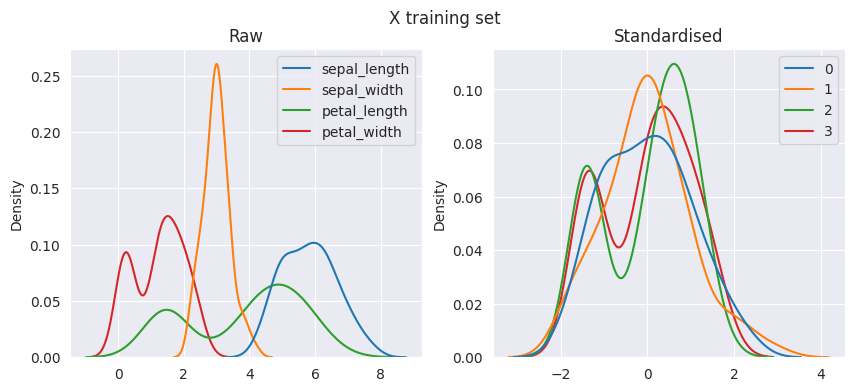

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
fig.suptitle("X training set")
axes[0].set_title("Raw")
axes[1].set_title("Standardised")
sb.kdeplot(x_train, ax=axes[0])
sb.kdeplot(x_train_st,ax=axes[1]);

### Model : logistic regression

We import the class `Linear Regression` from the `linear_model` subsection of the `sklrean`:

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)           # model object
model.fit(x_train_st, y_train)                       # train the model in the training set
y_pred = model.predict(x_test_st)                    # make predictions on the test set

In [16]:
(y_test == y_pred).sum()/len(y_test)                 # fraction of correct classifications, i.e. accuracy

0.9833333333333333

## Classification quality evaluation

Knowing the values of the predicted classes, we can evaluate the classification with metrics such as `accuracy`:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9833333333333333

See [Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) for more on prediction quality evaluation.

### Cross validation
We can see that the accuracy score is quite high, but how can we be sure this is not due to the train/test choice in this instance? Let's repeat the procedure as a function:

In [18]:
def logreg(X, Y, test_size=0.45, random_state=123):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, Y, test_size=test_size, random_state=random_state)                     # split train/test
    le =LabelEncoder()                                                                             # encode
    le.fit(y_train)
    y_train = le.transform(y_train)
    y_test = le.transform(y_test)
    scaler = StandardScaler()                                                                      # scaler : standardisation
    scaler.fit(X_train)
    X_train_st = scaler.transform(X_train)
    X_test_st = scaler.transform(X_test)
    model = LogisticRegression(random_state=random_state)                                          # model: logistic regression
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)                                                              # prediction / accuracy score
    return accuracy_score(y_test, y_pred)

In [19]:
logreg(X,Y,random_state=None)

0.9852941176470589

The resulting accuracy scores differ significantly depending on how the data set is split, which does not allow to evaluate the performance of the model objectively. In practice the problem is solved using *cross-validation*. The basic idea is to repeat the procedure, e.g. `logreg`, and take the mean accuracy.  The predefined Scikit learn function `cross_validate()` does exactly that. The main parameters of the function are the `model`, in this case logistic regression, the `full feature set and the target` and `cv` which is the number of iterations to be performed:

In [20]:
from sklearn.model_selection import cross_validate
# Standardise the features on the full data set
scaler = StandardScaler()
full_train = scaler.fit_transform(iris[features])
# Encode the label
le =LabelEncoder()
class_encoded = le.fit_transform(iris['class'])
cv = cross_validate(model, full_train, class_encoded, cv=10)
cv

{'fit_time': array([0.0023036 , 0.0019362 , 0.00206161, 0.00263524, 0.00198221,
        0.00185347, 0.00230503, 0.00222373, 0.00191307, 0.00210381]),
 'score_time': array([0.00032258, 0.0003078 , 0.00029945, 0.0004406 , 0.0003016 ,
        0.00028229, 0.00042295, 0.00034571, 0.00027132, 0.00028849]),
 'test_score': array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
        0.93333333, 0.8       , 1.        , 1.        , 1.        ])}

In [21]:
cv['test_score'].mean()

0.9600000000000002

## Hyperparameter tuning - Grid Search

Trying to solve a quite simple problem of Iris type classification, we were able to achieve a very high accuracy rate by applying a default version of the classifier. But what if the performance quality is not satisfactory? It is possible to improve the model performance with *hyperparameter optimization*. In Scikit learn, such possibility is provided with the class `GridSearchCV`.


In [22]:
from sklearn.model_selection import GridSearchCV

Recall the te logistic regression regularisation penalties $L1$ and $L2$ and the *complexity* parameter $\lambda$. These were used in regression coefficients shrinkage where larger $\lambda$ means greater shrinkage. With these parameters one could control the models behaviour for better or worse. The function `GridSearchCV` provides the machinery to traverse different settings using a dictionary along with a `cv` parameter for number cross-validation iterations.

In [23]:
?LogisticRegression

From the documentation we can see that the parameter **C** ( $1/\lambda$ ), has a default value 1, but, in theory can be any value higher than 0. The default value of a penalty norm is an `l2` norm, but there are other choices available, such as: `{'l1', 'l2', 'elasticnet', 'none'}`. In addition, you may choose among difference solvers (optimisation algorithms) such as `lbfgs`, `liblinear` etc. See for more details [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html).



In [24]:
gs_params = {'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],                       # C = 1/lambda
             'penalty': ['l2'],                                           #
             'solver' : ['liblinear', 'newton-cg', 'newton-cholesky', 'lbfgs'] }   # add default 'lbfgs'

gs = GridSearchCV(model, gs_params, cv=5)
gs.fit(full_train, class_encoded);

Using the attribute `.best_params_` we can check which values of the parameters were selected by the `GridSearch` algorithm as optimal:

In [25]:
gs.best_params_

{'C': 2, 'penalty': 'l2', 'solver': 'newton-cg'}

The attribute `.best_score_` allows us to check what is the level of the classification accuracy after the best values of model parameters (`best_params_`) have been applied:

In [26]:
# Mean cross-validated score of the best_estimator
gs.best_score_

0.9666666666666668

## SVM

With scikit-learn framework you can easily switch between models. Here we use support vector machine as another supervised model for classification:

In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train_st, y_train)
y_pred = clf.predict(x_test_st)

In [28]:
accuracy_score(y_pred,y_test)

0.9833333333333333

## k-nearest neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_st,y_train)
y_pred = neigh.predict(x_test_st)

In [30]:
pd.Series(y_pred).value_counts()

0    23
1    20
2    17
Name: count, dtype: int64

In [31]:
pd.Series(y_test).value_counts()

0    23
1    19
2    18
Name: count, dtype: int64

In [32]:
accuracy_score(y_test,y_pred)

0.9833333333333333